Crashes: 5145


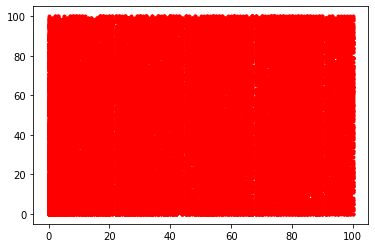

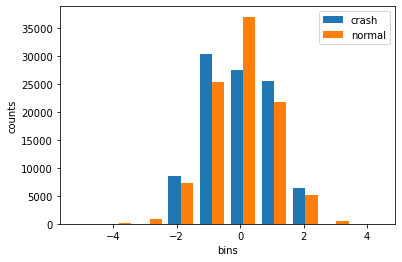

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
n = 12000
target_k = 3523
target_o = 21.9
k = 1

x = 0
y = 0
crash = False
crash_counter = 0


BinFile = open("file.bin", "rb")
data = np.fromfile(BinFile, dtype=np.uint32)

x_position = []
y_position = []
counter = 0
for i in data:
    if counter % 2:
        y_position.append(round(np.uint32(i)/256 * 100))
    else:
        x_position.append(round(np.uint32(i)/256 * 100))
    counter += 1

x_check = []
y_check = []
for i in range(0, 12000-1):
    x = x_position[i]
    y = y_position[i]
    for j in range(len(x_check)):
        if abs(x - x_check[j]) < 1 and abs(y - y_check[j]) < 1:
            crash = True
            crash_counter += 1
            break
    if not crash:
        x_check.append(x)
        y_check.append(y)
    crash = False

print("Crashes:",crash_counter)

plt.figure()
plt.plot(x_position, y_position, 'r.')
plt.show()

Dimension2 = np.column_stack((x_position, y_position))


Sorted2D = np.sort(Dimension2, axis = 0)
Scaled2D = (Sorted2D - Sorted2D.mean())/Sorted2D.std()

Scaled2D = np.reshape(Scaled2D, (98304 ,  ))


Normal = np.random.normal(loc = 0, scale = 1, size = np.size(Scaled2D))
Normal = np.sort(Normal)

plt.figure()
plt.hist([Scaled2D, Normal], label = ['crash', 'normal'])
plt.xlabel('bins')
plt.ylabel('counts')
plt.legend(loc='best')
ax = plt.gca()
ax.grid(False)
plt.show()

